# Data Preprocessing Assignment
Dataset : https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score


### Reading the Dataset

In [2]:
dataset = pd.read_csv("./stroke-data.csv")

In [3]:
dataset.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
dataset.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


## Data Analysis
Since ID is just an identifier, and won't be used during training, we can safely drop it.

In [5]:
dataset = dataset.drop(columns='id')
dataset.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [6]:
dataset.groupby(['gender', 'stroke']).count()

age  hypertension  heart_disease  ever_married  work_type  \
gender stroke                                                               
Female 0       2853          2853           2853          2853       2853   
       1        141           141            141           141        141   
Male   0       2007          2007           2007          2007       2007   
       1        108           108            108           108        108   
Other  0          1             1              1             1          1   

               Residence_type  avg_glucose_level   bmi  smoking_status  
gender stroke                                                           
Female 0                 2853               2853  2777            2853  
       1                  141                141   120             141  
Male   0                 2007               2007  1922            2007  
       1                  108                108    89             108  
Other  0                    1                  1     1               1

Since the gender 'Other' has a very tiny footprint in the dataset, we will drop rows with gender = 'Other'. This is done to prevent outliers and thus causing errors in machine learning.

In [7]:
dataset = dataset.drop(dataset[dataset['gender'] == 'Other'].index)
dataset.groupby(['gender', 'stroke']).count()

age  hypertension  heart_disease  ever_married  work_type  \
gender stroke                                                               
Female 0       2853          2853           2853          2853       2853   
       1        141           141            141           141        141   
Male   0       2007          2007           2007          2007       2007   
       1        108           108            108           108        108   

               Residence_type  avg_glucose_level   bmi  smoking_status  
gender stroke                                                           
Female 0                 2853               2853  2777            2853  
       1                  141                141   120             141  
Male   0                 2007               2007  1922            2007  
       1                  108                108    89             108

## Convert categorical data to numerical data

In [8]:
print(dataset['gender'].unique())  
print(dataset['smoking_status'].unique())  
print(dataset['ever_married'].unique())  
print(dataset['work_type'].unique())  
print(dataset['Residence_type'].unique())  

['Male' 'Female']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']


In [9]:
dataset.replace(to_replace=['Male','Female'], value=[1, 2], inplace=True)
dataset.replace(to_replace=['formerly smoked', 'never smoked', 'smokes', 'Unknown'], value=[1, 2, 3, 4], inplace=True)
dataset.replace(to_replace=['Yes', 'No'], value=[1, 2], inplace=True)
dataset.replace(to_replace=['Private', 'Self-employed', 'Govt_job', 'children' ,'Never_worked'], value=[1, 2, 3, 4, 5], inplace=True)
dataset.replace(to_replace=['Urban' ,'Rural'], value=[1, 2], inplace=True)

dataset.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,2,61.0,0,0,1,2,2,202.21,NaN,2,1
2,1,80.0,0,1,1,1,2,105.92,32.5,2,1
3,2,49.0,0,0,1,1,1,171.23,34.4,3,1
4,2,79.0,1,0,1,2,2,174.12,24.0,2,1
5,1,81.0,0,0,1,1,1,186.21,29.0,1,1
6,1,74.0,1,1,1,1,2,70.09,27.4,2,1
7,2,69.0,0,0,2,1,1,94.39,22.8,2,1
8,2,59.0,0,0,1,1,2,76.15,NaN,4,1
9,2,78.0,0,0,1,1,1,58.57,24.2,4,1


## Plotting Graphs for analysis

<AxesSubplot:xlabel='ever_married', ylabel='count'>

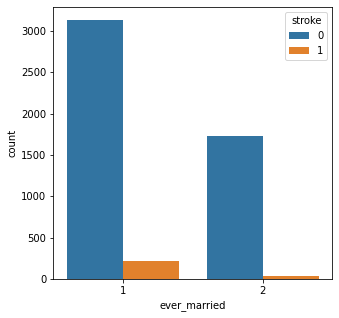

In [10]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x=dataset['ever_married'], hue='stroke', data=dataset)

We observe from this chart that stroke is more likely in people are married. 

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

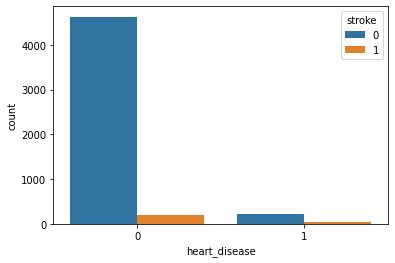

In [11]:
sns.countplot(x=dataset['heart_disease'], hue='stroke', data=dataset)

Surprisingly enough, we find that people without heart diseases are more likely to get a stroke. But, since more people are also not having a heart disease, this is far from an accurate conclusion. For this, we will now observe the count after grouping it

In [12]:
dataset.groupby(['heart_disease', 'stroke'])['stroke'].count()

heart_disease  stroke
0              0         4631
               1          202
1              0          229
               1           47
Name: stroke, dtype: int64

<AxesSubplot:xlabel='work_type', ylabel='count'>

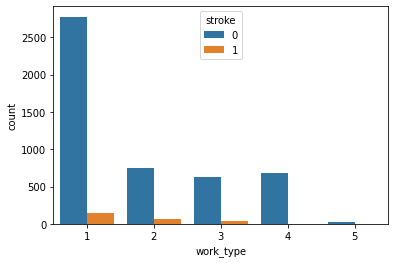

In [13]:
sns.countplot(x=dataset['work_type'], hue='stroke', data=dataset)

People who have worked are more likely to get a stroke. Moreover, it looks like private work is what causes a stroke more than other work types

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

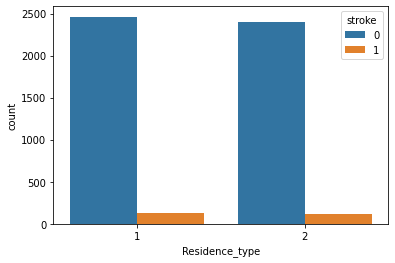

In [14]:
sns.countplot(x=dataset['Residence_type'], hue='stroke', data=dataset)

The strokes in Urban areas are very slightly higher than the ones in rural areas. However, the difference is negligible enough that it probably won't make a lot of difference.

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

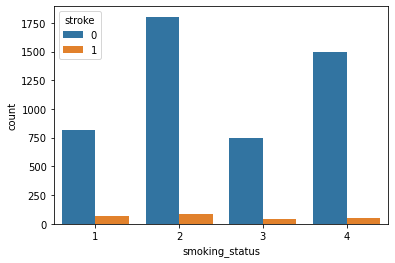

In [15]:
sns.countplot(x=dataset['smoking_status'], hue='stroke', data=dataset)

<AxesSubplot:xlabel='hypertension', ylabel='count'>

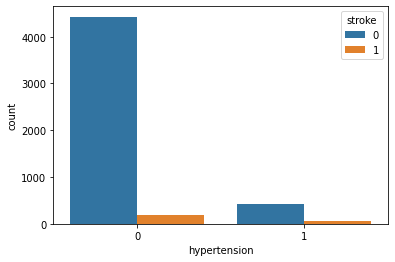

In [16]:
sns.countplot(x=dataset['hypertension'], hue='stroke', data=dataset)

<AxesSubplot:xlabel='age', ylabel='Count'>

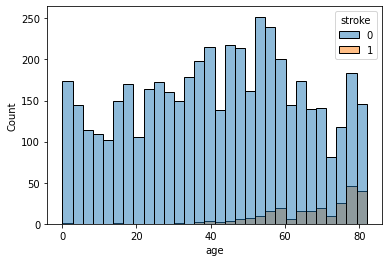

In [17]:
sns.histplot(x=dataset['age'], hue='stroke', bins=30, data=dataset)

We observe, that chances of stroke increases with age

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

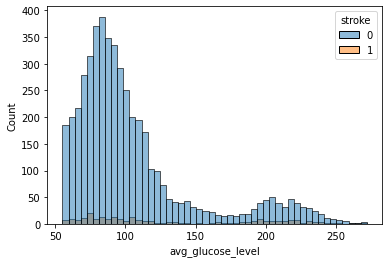

In [18]:
sns.histplot(x=dataset['avg_glucose_level'], hue='stroke', bins=50, data=dataset)

We observe that low glucose levels as well as high glucose levels can cause a stroke. Somewhere around 150 is where it is least likely to get a stroke. 

## Checking for duplicates 

In [19]:
print(dataset.duplicated().any())

False


Since no duplicates were found, we move on. If duplicates had existed, we would execute the following block of code. 

In [20]:
dataset = dataset.drop_duplicates()
print(dataset.duplicated().any())

False


## Checking for missing values

In [21]:
null_value_count = dataset.isnull().sum()
null_value_count

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [22]:
total_values = np.product(dataset.shape)
total_missing_values = null_value_count.sum()

percent_of_missing_data = (total_missing_values / total_values) * 100
percent_of_missing_data

0.3576576095660065

We find that only the BMI column has missing values. For analysis, we check the percentage of rows where BMI is missing.

In [23]:
percent_of_missing_bmi = (dataset['bmi'].isnull().sum()/dataset['bmi'].count()) * 100
percent_of_missing_bmi

4.095354523227384

Around 4.1% of rows have missing values. Since this figure is too low, we can safely drop these values. However, in the spirit of experimentation, we will take three separate datasets, one with mean substitution, one with mode substitution and one where we drop the rows. 

In [24]:
mean_substituted_dataset = dataset.copy()
mean_substituted_dataset['bmi'] = mean_substituted_dataset['bmi'].fillna(mean_substituted_dataset['bmi'].mean())
mean_substituted_dataset.isnull().sum(), dataset.isnull().sum()

(gender               0
 age                  0
 hypertension         0
 heart_disease        0
 ever_married         0
 work_type            0
 Residence_type       0
 avg_glucose_level    0
 bmi                  0
 smoking_status       0
 stroke               0
 dtype: int64,
 gender                 0
 age                    0
 hypertension           0
 heart_disease          0
 ever_married           0
 work_type              0
 Residence_type         0
 avg_glucose_level      0
 bmi                  201
 smoking_status         0
 stroke                 0
 dtype: int64)

In [25]:
mode_substituted_dataset = dataset.copy()
mode_substituted_dataset['bmi'] = mode_substituted_dataset['bmi'].fillna(mode_substituted_dataset['bmi'].mode()[0])
mode_substituted_dataset.isnull().sum(), dataset.isnull().sum()

(gender               0
 age                  0
 hypertension         0
 heart_disease        0
 ever_married         0
 work_type            0
 Residence_type       0
 avg_glucose_level    0
 bmi                  0
 smoking_status       0
 stroke               0
 dtype: int64,
 gender                 0
 age                    0
 hypertension           0
 heart_disease          0
 ever_married           0
 work_type              0
 Residence_type         0
 avg_glucose_level      0
 bmi                  201
 smoking_status         0
 stroke                 0
 dtype: int64)

In [26]:
removed_values_dataset = dataset.copy()
removed_values_dataset = removed_values_dataset.dropna()
removed_values_dataset.isnull().sum(), dataset.isnull().sum()

(gender               0
 age                  0
 hypertension         0
 heart_disease        0
 ever_married         0
 work_type            0
 Residence_type       0
 avg_glucose_level    0
 bmi                  0
 smoking_status       0
 stroke               0
 dtype: int64,
 gender                 0
 age                    0
 hypertension           0
 heart_disease          0
 ever_married           0
 work_type              0
 Residence_type         0
 avg_glucose_level      0
 bmi                  201
 smoking_status         0
 stroke                 0
 dtype: int64)

# Training 

## Splitting the data into training and testing data

In [27]:
x_train, x_test, y_train, y_test = train_test_split(mean_substituted_dataset.drop('stroke', axis=1).values,mean_substituted_dataset['stroke'].values, test_size=0.3, shuffle=True)

## Training the data

In [28]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
f1_score(y_test, y_pred, average='micro')

0.9549902152641878

In [29]:
x_train, x_test, y_train, y_test = train_test_split(mode_substituted_dataset.drop('stroke', axis=1).values,mode_substituted_dataset['stroke'].values, test_size=0.3, shuffle=True)

In [30]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
f1_score(y_test, y_pred, average='micro')

0.9452054794520548

In [31]:
x_train, x_test, y_train, y_test = train_test_split(removed_values_dataset.drop('stroke', axis=1).values,removed_values_dataset['stroke'].values, test_size=0.3, shuffle=True)

In [32]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
f1_score(y_test, y_pred, average='micro')

0.9531568228105907